In [1]:
%matplotlib inline
import os
import sys
#os.environ["THEANO_FLAGS"] = "device=gpu"
sys.path.append(os.getcwd()+"/..")
from tasks import check
import matplotlib.pyplot as plt
import numpy as np

/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/mcherti/build/Theano/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


Couldn't import dot_parser, loading of dot files will not be possible.


/home/mcherti/work/code/scikit-learn/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.19.
  "This module will be removed in 0.19.", DeprecationWarning)


In [15]:
from lasagnekit.datasets.mnist import MNIST
data = MNIST()
data.load()
w, h, c = 28, 28, 1
#from data import load_data
#data, w, h, c, _, _ = load_data(dataset="digits", batch_size=60000)

In [217]:
from sklearn.decomposition import PCA
X = data.X.reshape((data.X.shape[0], w*h*c))
model = PCA(n_components=70)
model.fit(X)

PCA(copy=True, n_components=70, whiten=False)

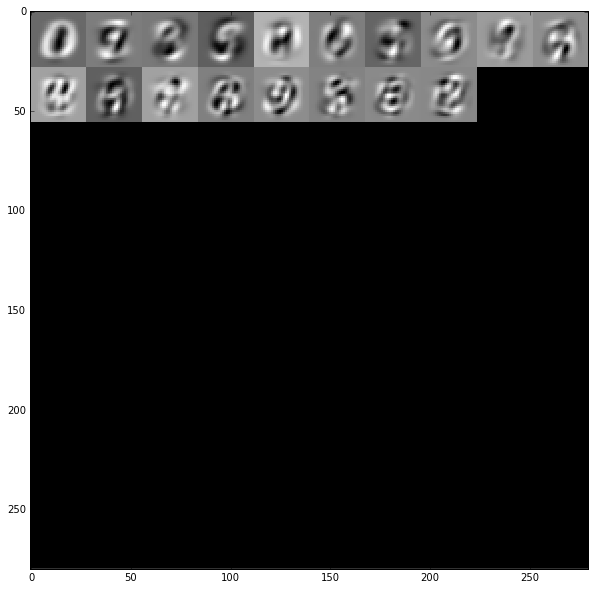

In [185]:
W = model.components_.reshape((model.components_.shape[0], c, w, h))
from lasagnekit.misc.plot_weights import tile_raster_images, dispims_color
fig = plt.figure(figsize=(10, 10))
if c == 1:
    img = tile_raster_images(W, (w, h), (10, 10))
    plt.imshow(img, cmap="gray", interpolation='none')
else:
    W = W.transpose((0, 2, 3, 1))
    img = dispims_color(W)
    plt.imshow(img, interpolation='none')

46578.6432942
13.0
[46578.643294198162, 6065.0, 2042.0, 848.0, 457.0, 244.0, 143.0, 77.0, 48.0, 30.0, 13.0, 6.0, 4.0, 3.0, 1.0, 0.0]


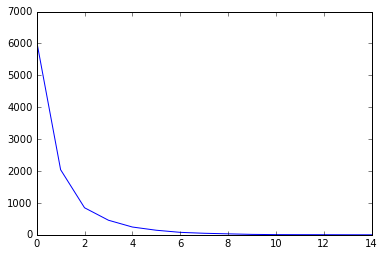

In [218]:
rec = []
np.random.seed(1234)
s  = np.random.uniform(size=(200, w*h*c))

for i in range(100):
    s_prev = s
    #s += np.random.normal(0, 0.001, size=s.shape)
    s = model.inverse_transform(model.transform(s))
    s = s > 0.5
    s = s.astype(np.float32)
    rec.append(((s_prev-s)**2).sum())
    if rec[-1] == 0:
        break
    if i % 10 == 0:
        print(((s_prev-s)**2).sum())
print(rec)
plt.plot(rec[1:])


In [219]:
nb_iterations.append((model.n_components, len(rec)))

[ 9 31 24 42 33 27 33 32 36 35 24 31 27 20 24 20 16]


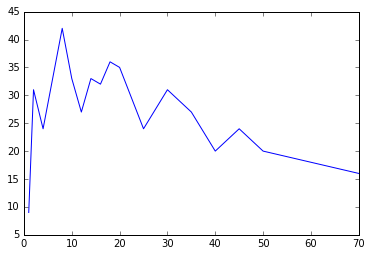

In [220]:
plt.clf()
plt.plot(np.array(nb_iterations)[:, 0], np.array(nb_iterations)[:, 1])
print(np.array(nb_iterations)[:, 1])

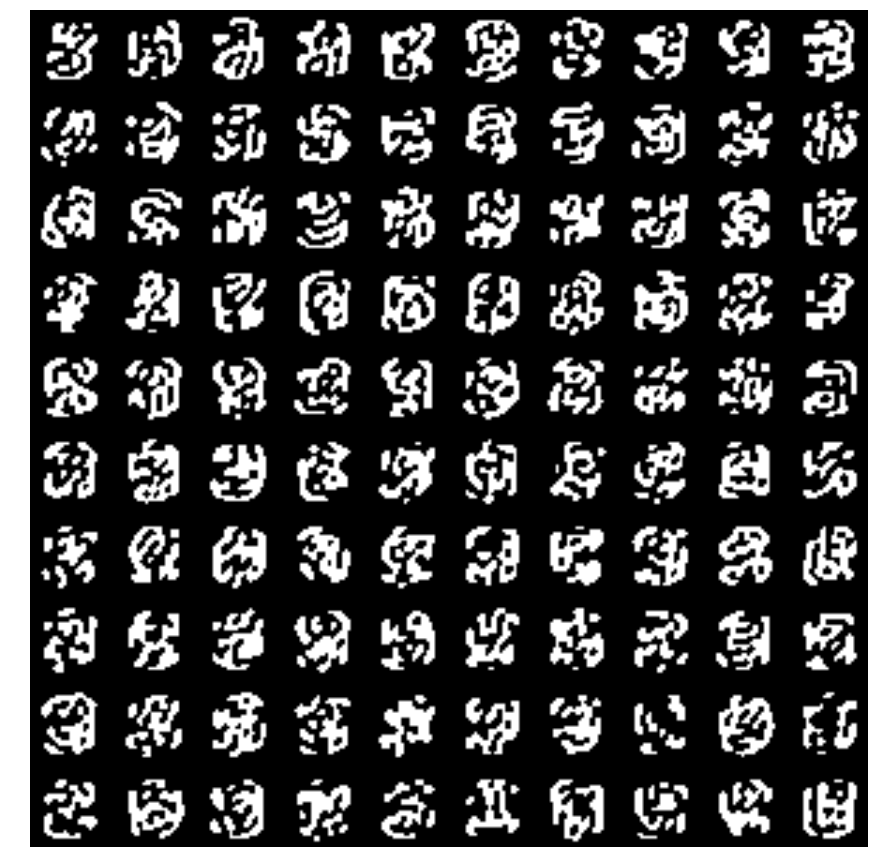

In [221]:
s = s.reshape((s.shape[0], c, w, h))
fig = plt.figure(figsize=(15, 15))

if c == 1:
    img = tile_raster_images(s, (w, h), (10, 10), tile_spacing=(2, 2))
    plt.axis('off')
    plt.imshow(img, cmap="gray")
else:
    plt.axis('off')
    s = s.transpose((0, 2, 3, 1))
    img = dispims_color(s)
    plt.imshow(img)

In [8]:
from collections import Counter
S = s.reshape((s.shape[0], -1))
S.flags.writeable = False
nb_uniq = (len(Counter(map(lambda e:hash(e.data), S))))
print("Perc. of unique : {}".format(float(nb_uniq) / len(S)))

Perc. of unique : 1.0


In [225]:
from sklearn.decomposition import PCA
X = data.X.reshape((data.X.shape[0], w*h*c))

n_components_list = range(0, 20) + range(20, 40, 2) + range(40, 80, 4) + range(100, 500, 10)
nb_iterations = []
for n_components in n_components_list:
    model = PCA(n_components=n_components)
    model.fit(X)
    rec = []
    np.random.seed(1234)
    s  = np.random.uniform(size=(200, w*h*c))

    for i in range(100):
        s_prev = s
        #s += np.random.normal(0, 0.001, size=s.shape)
        s = model.inverse_transform(model.transform(s))
        s = s > 0.5
        s = s.astype(np.float32)
        rec.append(((s_prev-s)**2).sum())
        if rec[-1] == 0:
            break
        if i % 10 == 0:
            print(((s_prev-s)**2).sum())
    nb_iterations.append(len(rec))
    print(nb_iterations)

52275.9547538
[2]
52131.5873879
[2, 9]
52046.4046821
112.0
12.0
[2, 9, 31]
51949.0843671
208.0
19.0
2.0
[2, 9, 31, 32]
51880.3058891
402.0
18.0
[2, 9, 31, 32, 24]
51815.8416449
364.0
45.0
6.0
2.0
[2, 9, 31, 32, 24, 42]
51734.4597144
254.0
19.0
[2, 9, 31, 32, 24, 42, 29]
51662.45247
269.0
21.0
[2, 9, 31, 32, 24, 42, 29, 30]
51626.0262322
359.0
33.0
2.0
2.0
[2, 9, 31, 32, 24, 42, 29, 30, 42]
51385.9346549
251.0
35.0
6.0
[2, 9, 31, 32, 24, 42, 29, 30, 42, 34]
51271.6191814
226.0
47.0
5.0
[2, 9, 31, 32, 24, 42, 29, 30, 42, 34, 33]
51320.5506549
191.0
37.0
5.0
[2, 9, 31, 32, 24, 42, 29, 30, 42, 34, 33, 33]
51250.5378026
224.0
10.0
[2, 9, 31, 32, 24, 42, 29, 30, 42, 34, 33, 33, 27]
51087.6784744
240.0
30.0
5.0
[2, 9, 31, 32, 24, 42, 29, 30, 42, 34, 33, 33, 27, 34]
50906.9626767
269.0
24.0
3.0
[2, 9, 31, 32, 24, 42, 29, 30, 42, 34, 33, 33, 27, 34, 33]
50792.9350968
387.0
35.0
8.0
[2, 9, 31, 32, 24, 42, 29, 30, 42, 34, 33, 33, 27, 34, 33, 40]
50667.8517472
355.0
38.0
1.0
[2, 9, 31, 32, 24, 42,

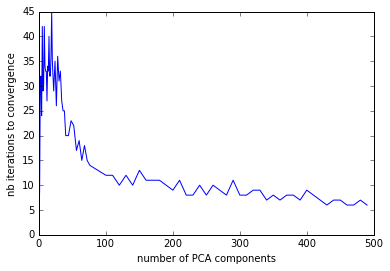

In [ ]:
plt.plot(n_components_list, nb_iterations)
plt.xlabel("number of PCA components")
plt.ylabel('nb iterations to convergence')